In [1]:
import sys
import os
import numpy as np

In [2]:
sys.path.append('.')
sys.path.append('..')

In [8]:
from PIL import Image
import numpy as np
from skimage.morphology import erosion, dilation
from skimage import measure
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from utils import numpy_to_b64, rescale
from unsupervised_models import kmeans_seg

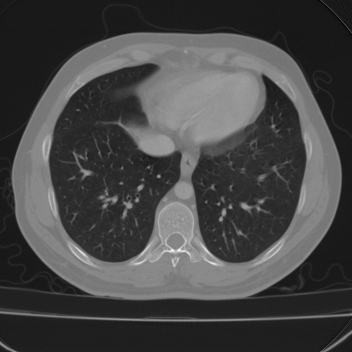

In [6]:
path='../app_uploaded_files/chaos_samples/CHAOS_Volume001_slice004.png'
img = Image.open(path)
img

In [10]:
img = np.array(img)
ds = kmeans_seg(img)

In [60]:
def get_subplots_fig(rows, cols, imgs, types=None):
    # 需要保证输入的都是rgb, 0-255的numpy图像
    fig = make_subplots(
        rows, cols,
        horizontal_spacing=0,
        vertical_spacing=0,
        shared_xaxes=True,
        shared_yaxes=True,
    )

    for i in range(1, rows+1):
        for j in range(1, cols+1):
            idx = (i-1)*cols+j
            print(i, j, idx)
            im = imgs[idx-1]

            img_height, img_width = im.shape[0], im.shape[1]
            scale_factor = 1
            
            enc_format = 'png'
            b64 = numpy_to_b64(im, enc_format=enc_format, scalar=False)
            decoded = 'data:image/{};base64,{}'.format(enc_format, b64)
            
            fig.update_xaxes(
                visible=False,
                range=[0, img_width * scale_factor]
            )

            fig.update_yaxes(
                visible=False,
                #range=[0, img_height * scale_factor],
                range=[img_height * scale_factor, 0],  # 调整坐标范围用
                # the scaleanchor attribute ensures that the aspect ratio stays constant
                scaleanchor="x"
            )
            fig.add_trace(
                go.Scatter(
                    x=[0, img_width * scale_factor],
                    y=[0, img_height * scale_factor],
                    mode="markers",
                    marker_opacity=0
                )
            )
            fig.add_layout_image(
                row=i,
                col=j,
                source=decoded,
                xref="x",
                yref="y",
                x=0,
                y=0,
                sizex=im.shape[1],
                sizey=im.shape[0],
                sizing="stretch",
                opacity=0.5,
                layer="below",
            )

    fig.update_layout(
        # clickmode='event+select',
        width=700,
        height=700,
        margin={"l": 0, "r": 0, "t": 0, "b": 0},
        paper_bgcolor="#272a31",
        plot_bgcolor="#272a31",
        showlegend=False
    )

    return fig

In [61]:
w, h = arr.shape[1], arr.shape[0]
lower, upper, left, right = 0, h, 0, w

croped = rescale(img[lower:upper+1, left:right+1])
dialated = rescale(ds['image_dilated'][lower:upper+1, left:right+1])
# dialated = skimage.color.label2rgb(dialated)
dialated = dialated

# 显示子图, 原图, 腐蚀处理后的, 颜色标签, 叠加(contour)
labels = rescale(ds['image_labels'][lower:upper+1, left:right+1])
mask_applied = rescale(ds['mask_applied'][lower:upper+1, left:right+1])

In [62]:
ds['label_values']

array([0, 1, 2, 3], dtype=int64)

In [63]:
fig = get_subplots_fig(2, 2, [croped, dialated, labels, mask_applied])


1 1 1
1 2 2
2 1 3
2 2 4


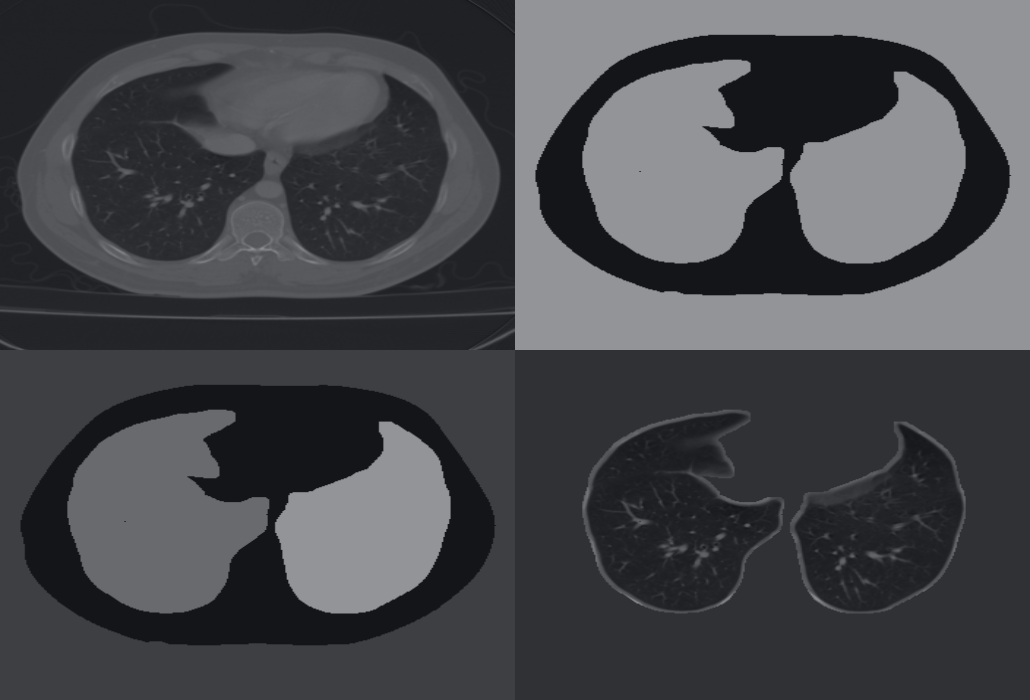

In [64]:
fig.show()